### Importamos variables

In [1]:
### Manipulación de Datos
import pandas as pd
import numpy as np

### Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

### Tratamiento de datos
from utils.funciones import CategoricalAnalysis, extended_describe

### Importamos datos    

In [2]:
df = pd.read_csv(r"data\raw\Customer_Info.csv")
df.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes
1,0003-MKNFE,Male,46,No,No,No,No,0,No
2,0004-TLHLJ,Male,50,No,No,No,No,0,No
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes


|Column Name |	Description| 
|--------------|----------|
|CustomerID	| A unique ID that identifies each customer. |
|Gender	| The customer’s gender: **Male, Female.**|
|Age	| The customer’s **current age**, in years, at the time the fiscal quarter ended. |
|Senior Citizen	 | Indicates if the customer is 65 or older: **Yes, No.** |
|Married	| Indicates if the customer is married: **Yes, No.** | 
|Dependents	| Indicates if the customer lives with any dependents: **Yes, No.** |
|Number of Dependents |	Indicates the **number of dependents** that live with the customer. |

In [3]:
print(f'La base de datos a analizar posee {df.shape[0]} filas y {df.shape[1]} columnas')
print(f'\nLas features que tenemos son: {list(df.columns)}')

La base de datos a analizar posee 7043 filas y 9 columnas

Las features que tenemos son: ['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'partner', 'dependents', 'number_of_dependents', 'married']


### Primera exploración

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           7043 non-null   object
 1   gender                7043 non-null   object
 2   age                   7043 non-null   int64 
 3   under_30              7043 non-null   object
 4   senior_citizen        7043 non-null   object
 5   partner               7043 non-null   object
 6   dependents            7043 non-null   object
 7   number_of_dependents  7043 non-null   int64 
 8   married               7043 non-null   object
dtypes: int64(2), object(7)
memory usage: 495.3+ KB


In [5]:
df.describe()

,age,number_of_dependents
count,7043.000000,7043.000000
mean,46.509726,0.468692
std,16.750352,0.962802
min,19.000000,0.000000
25%,32.000000,0.000000
50%,46.000000,0.000000
75%,60.000000,0.000000
max,80.000000,9.000000


In [6]:
df.describe(include="object")

,customer_id,gender,under_30,senior_citizen,partner,dependents,married
count,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2
top,9995-HOTOH,Male,No,No,No,No,No
freq,1,3555,5642,5901,3641,5416,3641


In [7]:
df.isna().sum()

customer_id             0
gender                  0
age                     0
under_30                0
senior_citizen          0
partner                 0
dependents              0
number_of_dependents    0
married                 0
dtype: int64

In [8]:
df[df.duplicated()]

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married


- Poseemos un dataset sin valores nulos.
- La mayoria de nuestros usuarios se encuentran dentro del rango (60 - 32) presentando el registro de mayor edad en 80 años.
- No se repiten los cutomer_id.
- La mayoría de nuestros usuarios son hombres, asi como sin hijos y sin matrimonio alguno.
- Al tener un customer_id unico para cada, no poseemos duplicados

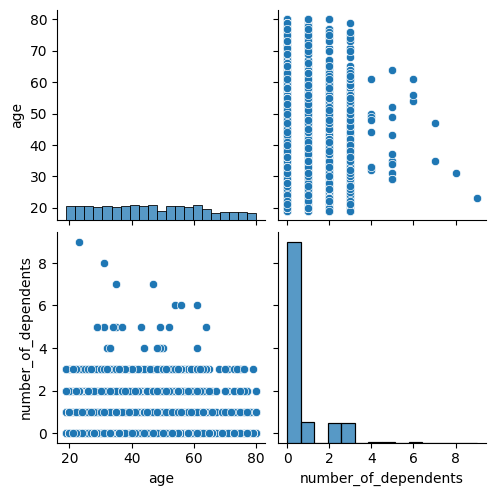

In [9]:
sns.pairplot(df)

In [10]:
df[df['partner'] != df['married']]

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married


- Al analizar los gráficos de 'partner' y 'married' notamos que estos son exactamente iguales en cuanto a respuesta. Por ende borrare la columna'married' con el fin de optimizar consultas.

In [11]:
df = df.drop(columns='married')

In [12]:
df.to_csv(path_or_buf=r'data\clean\customer_info_clean.csv',index=False)

### Análisis exploratorio

#### Análisis univariante

In [13]:
df = pd.read_csv(r"data\clean\customer_info_clean.csv")
df.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents
0,0002-ORFBO,Female,37,No,No,Yes,No,0
1,0003-MKNFE,Male,46,No,No,No,No,0
2,0004-TLHLJ,Male,50,No,No,No,No,0
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0


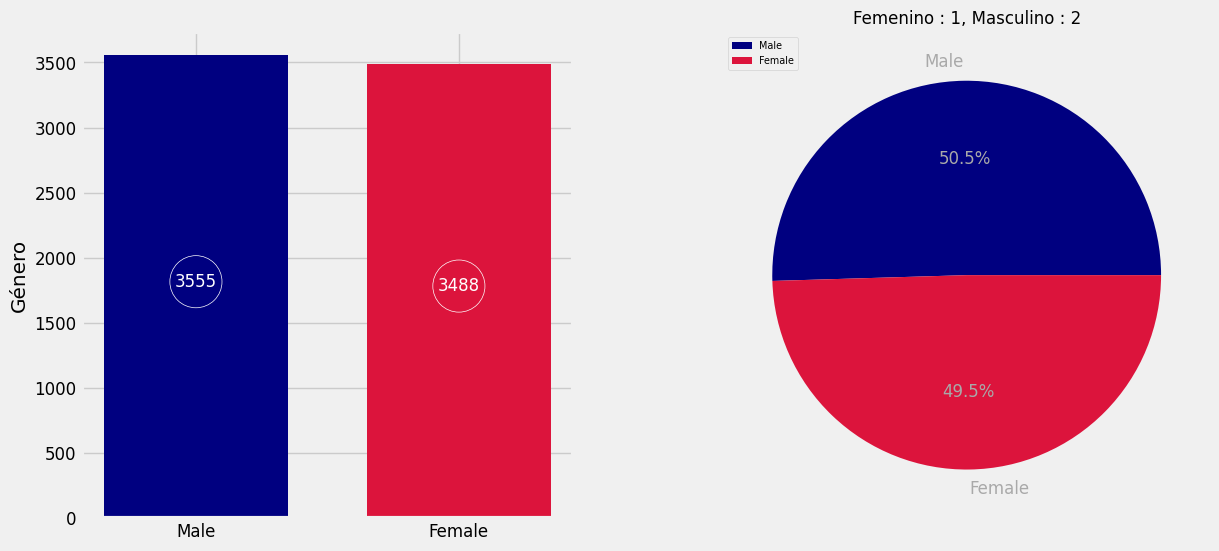

In [14]:
categorical_analyzer = CategoricalAnalysis(df=df)
categorical_analyzer.plot_top_categories(title='Femenino : 1, Masculino : 2', labely='Género', column_name='gender')

- Poseemos 3555 usuarios masculinos y 3488 femeninos.

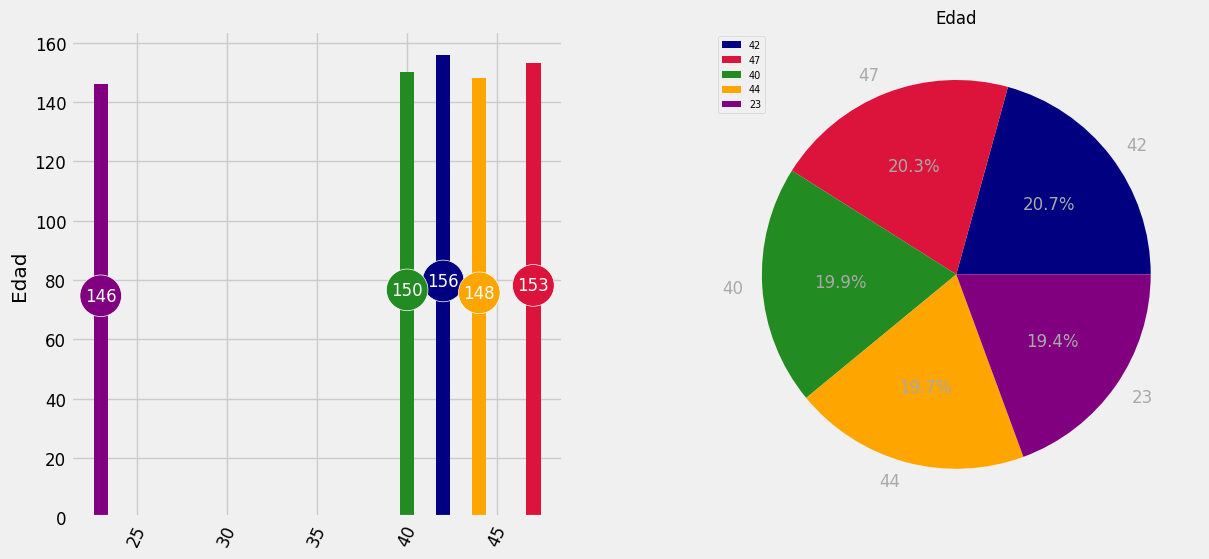

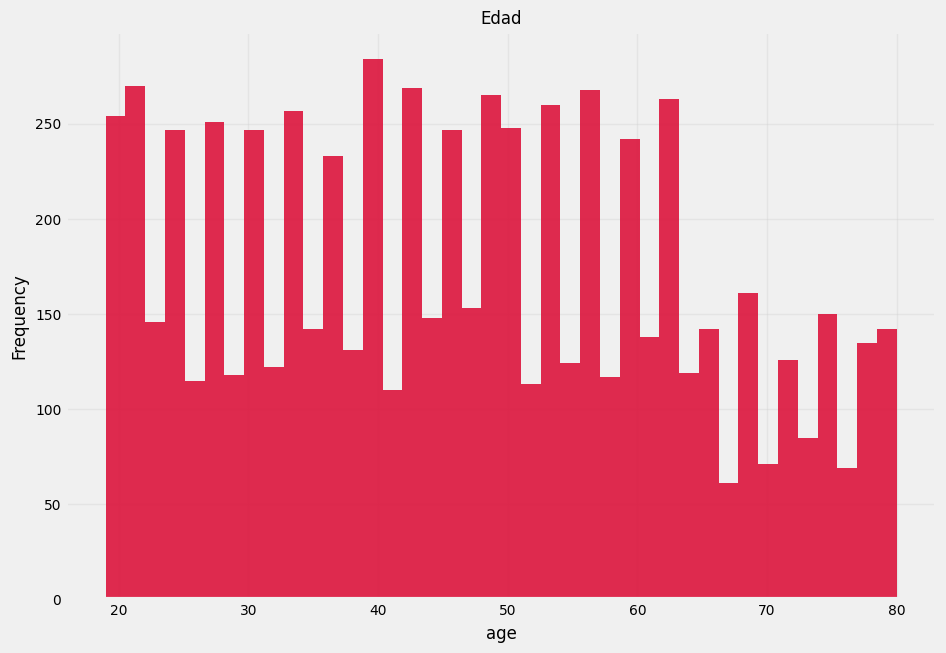

La distribución es platicúrtica con una curtosis de -1.0. Los datos se encuentran dispersos.
La distribución se encuentra sesgada hacia la izquierda 0.16.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
age,7043.0,46.509726,46.0,42,16.75,19.0,32.0,46.0,60.0,80.0,-1.0,0.16


In [15]:
categorical_analyzer.plot_top_categories(title='Edad', labely='Edad', column_name='age')
categorical_analyzer.plot_distribution(title= 'Edad', column_name='age', cant_bins = 40, color='crimson', rotation=0, alpha=0.9)

- Notamos que en el top cinco de categoria de edad se encuentra dentro del rango de 40 a 47 años excepto por el quinto puesto donde los usuarios presentan una notoria juventud en los 23 años con el 19,4% del total. Podemos notar también que nuestra mediana se encuentra en los 46 años de edad y los usuarios de 42 años abarcan un 20,7% del total tomando posición en moda, es decir, nuestro público de mayor presencia sería dentro de ese rango (40 a 47) por ende nuestras acciones deben de preservar y acondicionarse a dicho objetivo presentado.

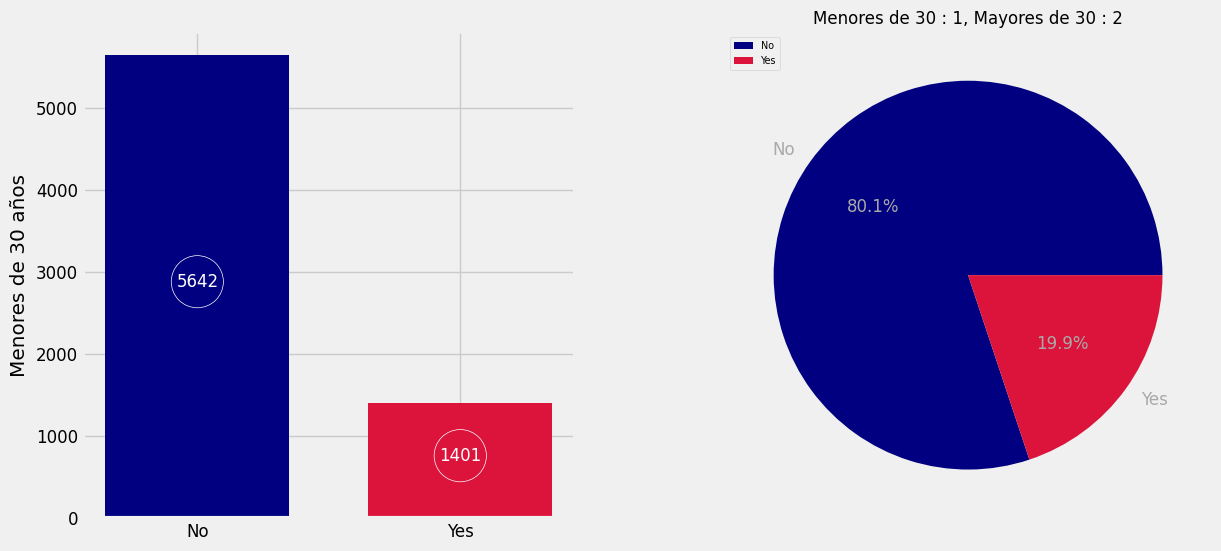

In [16]:
categorical_analyzer.plot_top_categories(title='Menores de 30 : 1, Mayores de 30 : 2', labely='Menores de 30 años', column_name='under_30')

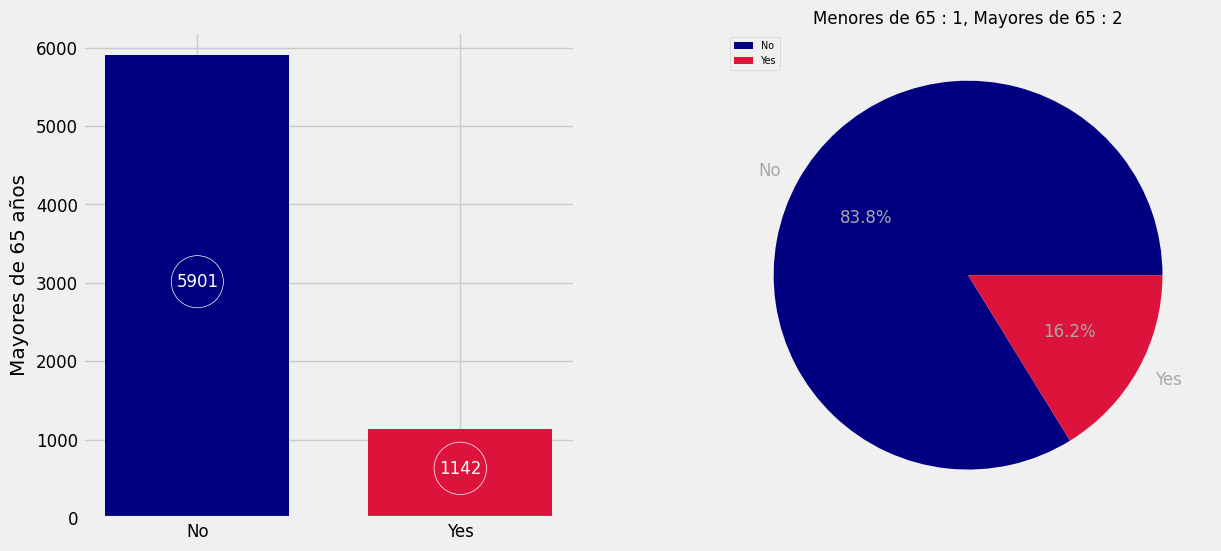

In [17]:
categorical_analyzer.plot_top_categories(title='Menores de 65 : 1, Mayores de 65 : 2', labely='Mayores de 65 años', column_name='senior_citizen')

- Como vimos anteriormente nuestro rango de edad es entre 40 y 47 años apróximadamente y solo un pequeña porción es menor a 30 años, el quinto puesto de 23 con 19,4% del total y otro porción mayor a 65 de años siendo de 1142 usuarios.

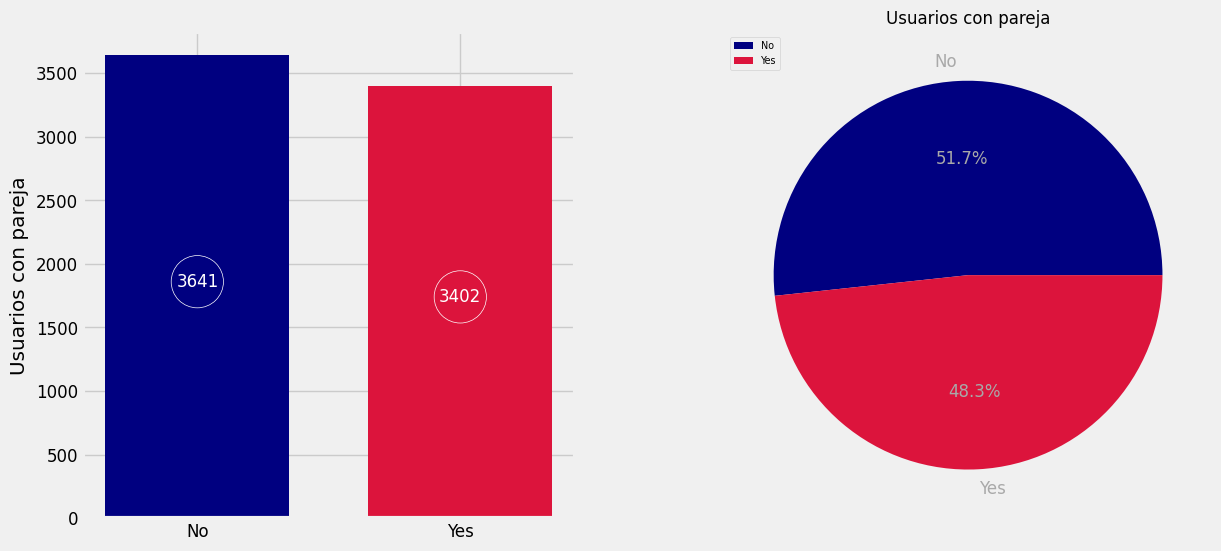

In [18]:
categorical_analyzer.plot_top_categories(title='Usuarios con pareja', labely='Usuarios con pareja', column_name='partner')

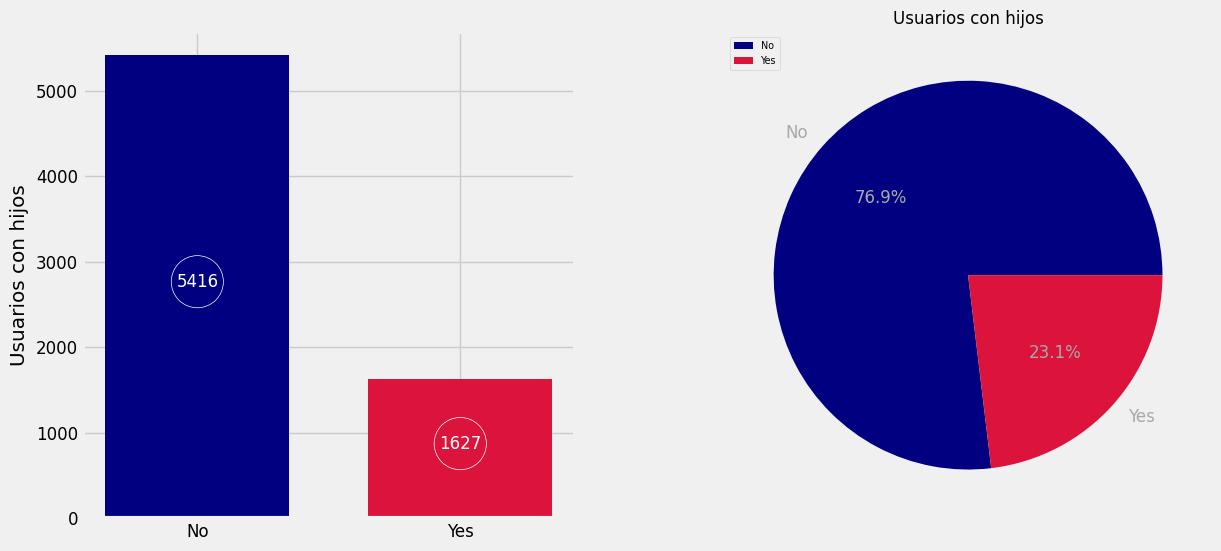

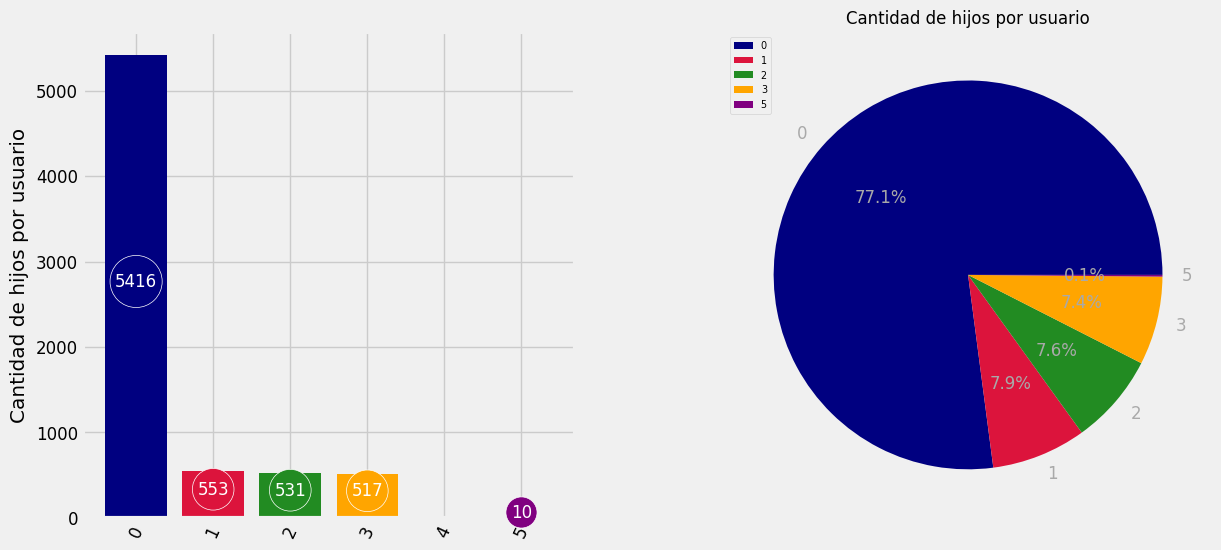

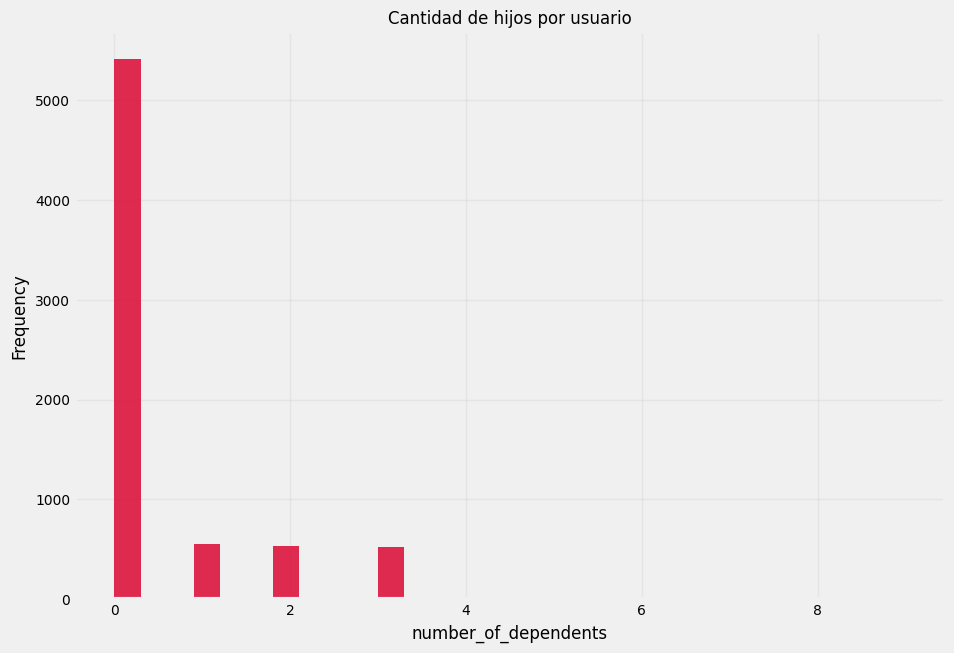

La distribución es leptocúrtica con una curtosis de 4.44. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 2.11.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
number_of_dependents,7043.0,0.468692,0.0,0,0.96,0.0,0.0,0.0,0.0,9.0,4.44,2.11


In [19]:
categorical_analyzer.plot_top_categories(title='Usuarios con hijos', labely='Usuarios con hijos', column_name='dependents')
categorical_analyzer.plot_top_categories(title='Cantidad de hijos por usuario', labely='Cantidad de hijos por usuario', column_name='number_of_dependents')
categorical_analyzer.plot_distribution(title= 'Cantidad de hijos por usuario', column_name='number_of_dependents', cant_bins = 30, color='crimson', rotation=0, alpha=0.9)

In [20]:
df[df['number_of_dependents'] == 9]

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents
2666,3787-TRIAL,Male,23,Yes,No,Yes,Yes,9
